In [2]:
import pandas as pd 

df = pd.read_csv('data/fd_curve_polymer/fd_curve_ring_inside_2_backward.csv', sep=';' , header=None, dtype=str)
df_2 = pd.read_csv('data/fd_curve_polymer/fd_curve_ring_inside_2_forward.csv', sep=';' , header=None, dtype=str)
df_3 = pd.read_csv('data/fd_curve_polymer/fd_curve_ring_outside_2_backward.csv', sep=';' , header=None, dtype=str)
df_4 = pd.read_csv('data/fd_curve_polymer/fd_curve_ring_outside_2_forward.csv', sep=';' , header=None, dtype=str)


df = df.astype(float) 
df_2 = df_2.astype(float) 
df_3 = df_3.astype(float) 
df_4 = df_4.astype(float) 

pd.set_option('display.float_format', '{:.10e}'.format)

In [3]:
df_curve_1 = df.T
df_curve_2 = df_2.T
df_curve_3 = df_3.T
df_curve_4 = df_4.T

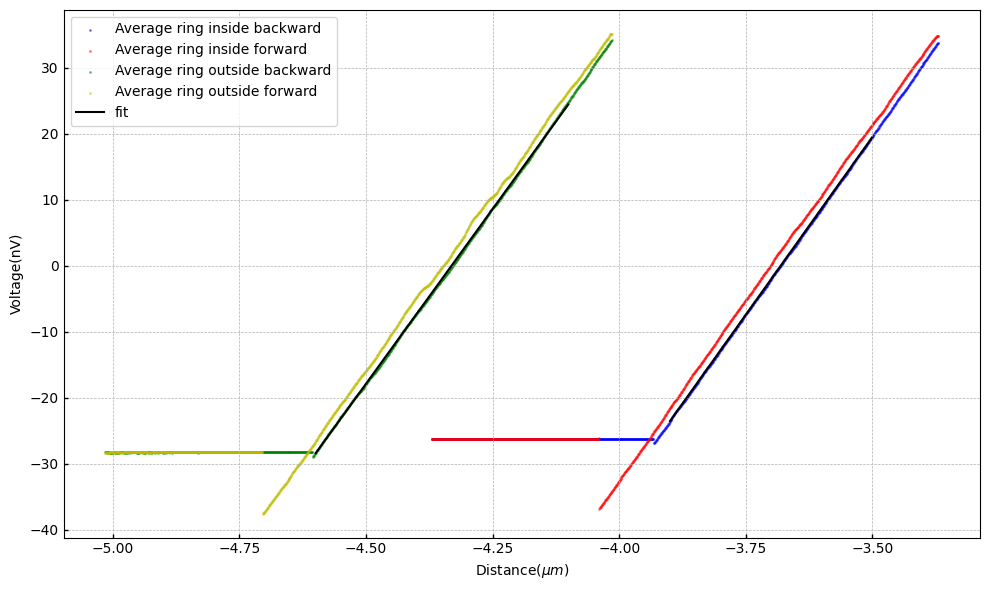

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))


x = df_curve_1[0] * 1e6
y = df_curve_1[1] * 32.8
x_2 = df_curve_2[0] * 1e6
y_2 = df_curve_2[1] * 32.8
x_3 = df_curve_3[0] * 1e6
y_3 = df_curve_3[1] * 32.8
x_4 = df_curve_4[0] * 1e6
y_4 = df_curve_4[1] * 32.8


plt.scatter(x,y, marker='.', color='b',s=5,alpha=0.4,label='Average ring inside backward')
plt.scatter(x_2,y_2, marker='.', color='r',s=5,alpha=0.4,label='Average ring inside forward') 
plt.scatter(x_3,y_3, marker='.', color='g',s=5,alpha=0.4,label='Average ring outside backward')
plt.scatter(x_4,y_4, marker='.', color='y',s=5,alpha=0.4,label='Average ring outside forward')

adhesion_1 = (y_2[0] - y_2.min())
adhesion_2 = (y_4[0] - y_4.min())


mask = np.logical_and(x>-3.9 , x<-3.5)
mask_2 = np.logical_and(x_3>-4.6 , x_3<-4.1)


x_segment = x[mask]
y_segment = y[mask]
x_2_segment = x_3[mask_2]
y_2_segment = y_3[mask_2]


p = np.polyfit(x_segment, y_segment, 1)
p_2 = np.polyfit(x_2_segment, y_2_segment, 1)


y_fit = np.polyval(p, x_segment)
y_fit_2 = np.polyval(p_2, x_2_segment)


plt.plot(x_segment, y_fit, color='black',label='fit')
plt.plot(x_2_segment, y_fit_2, color='black')

plt.xlabel('Distance($\mu m$)')
plt.ylabel('Voltage(nV)')
plt.legend()

plt.tick_params(direction='in', length=3, width=1)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)

plt.tight_layout() 
plt.savefig('polymere_fd_curve_calibration.pdf')

plt.show()

In [11]:
print(p[0],p_2[0])
print(adhesion_1,adhesion_2)

107.66179073907249 105.85988302300363


3.22

In [17]:
adhesion_1

1.2149541300000006e-08